# Kaggle Total Kullanıcı Verisi / Exploratory Data Analysis -EDA

Pandas yerine Polars ile başladık çünkü verimiz yaklaşık 3 milyon satır. Aşağıdaki tablodan ikisi arasındaki karşılaştırmayı görebilirsiniz:

| Use Case                        | Recommended Tool  |
| ------------------------------- | ----------------- |
| Small-to-medium data (<1M rows) | **Pandas**        |
| Very large data (>10M rows)     | **Polars**        |
| Real-time / batch processing    | **Polars**        |
| Data science prototyping        | **Pandas**        |
| Complex ETL pipelines           | **Polars (lazy)** |


In [91]:
import pandas as pd
import polars as pl
cfg = pl.Config()
cfg.set_tbl_rows(2000)
cfg.set_tbl_cols(2000)

df = pl.read_csv("/kaggle/input/kaggle-user-competition-medal-data/user_competition_medals.csv")

In [12]:
df.count()

UserName,DisplayName,Country,Solo Golds,Team Golds,Solo Silvers,Team Silvers,Solo Bronzes,Team Bronzes
u32,u32,u32,u32,u32,u32,u32,u32,u32
2909915,2909915,2909915,2909915,2909915,2909915,2909915,2909915,2909915


In [6]:
df[:10]

UserName,DisplayName,Country,Solo Golds,Team Golds,Solo Silvers,Team Silvers,Solo Bronzes,Team Bronzes
str,str,str,i64,i64,i64,i64,i64,i64
"""bestfitting""","""bestfitting""","""""",38,4,12,1,2,0
"""wowfattie""","""Guanshuo Xu""","""United States""",21,5,23,2,2,0
"""owenzhang1""","""Owen""","""United States""",14,4,11,3,3,1
"""titericz""","""Giba""","""Brazil""",11,50,24,32,28,5
"""confirm""","""Kohei""","""Japan""",10,9,27,12,20,1
"""ccccat""","""Sergey Yurgenson""","""United States""",10,7,17,5,7,3
"""naokazumizuta""","""Naokazu Mizuta""","""Japan""",10,3,15,0,7,0
"""cdeotte""","""Chris Deotte""","""United States""",9,15,19,5,7,2
"""tascj0""","""tascj""","""Japan""",9,8,9,2,2,1


# Kaggle'daki toplam Türk kullanıcı sayısında bakalım:

In [3]:
tr_df = df.filter(
    pl.col("Country").is_in(["Turkey", "Türkiye"])
)

print(f"Türkiye'den kayıtlı {len(tr_df)} Kaggle kullanıcısı var!\n")

Türkiye'den kayıtlı 7265 Kaggle kullanıcısı var!



En az 1 madalya sahibi Türk kullanıcılar:

In [35]:
tr_df_medal = tr_df.filter(
    (pl.col("Solo Golds") + pl.col("Team Golds") 
    +pl.col("Solo Silvers") + pl.col("Team Silvers") 
    +pl.col("Solo Bronzes") + pl.col("Team Bronzes") 
     
     >= 1)
)

print(f"Türkiye'den en az 1 madalya sahibi {len(tr_df_medal)} Kaggle kullanıcısı var!\n")

Türkiye'den en az 1 madalya sahibi 148 Kaggle kullanıcısı var!



In [41]:
tr_df_medal.head()


UserName,DisplayName,Country,Solo Golds,Team Golds,Solo Silvers,Team Silvers,Solo Bronzes,Team Bronzes,Total Medals
str,str,str,i64,i64,i64,i64,i64,i64,i64
"""aerdem4""","""Ahmet Erdem""","""Turkey""",6,22,11,18,5,1,63
"""datafan07""","""Ertuğrul Demir""","""Turkey""",2,2,2,6,4,0,16
"""barisumog""","""barisumog""","""Turkey""",2,1,17,0,6,0,26
"""fatihozturk""","""Fatih Ozturk""","""Turkey""",1,7,2,5,3,0,18
"""bvoskresenskii""","""BorisV""","""Turkey""",1,0,1,1,0,0,3


En çok madalyası olan ilk 10 Türk kullanıcı:

In [38]:
tr_df_medal = tr_df_medal.with_columns([
    (
        pl.col("Solo Golds") + pl.col("Team Golds") +
        pl.col("Solo Silvers") + pl.col("Team Silvers") +
        pl.col("Solo Bronzes") + pl.col("Team Bronzes")
    ).alias("Total Medals")
])

tr_df_medal.sort("Total Medals", descending=True).head(10)

UserName,DisplayName,Country,Solo Golds,Team Golds,Solo Silvers,Team Silvers,Solo Bronzes,Team Bronzes,Total Medals
str,str,str,i64,i64,i64,i64,i64,i64,i64
"""aerdem4""","""Ahmet Erdem""","""Turkey""",6,22,11,18,5,1,63
"""barisumog""","""barisumog""","""Turkey""",2,1,17,0,6,0,26
"""gunesevitan""","""Gunes Evitan""","""Türkiye""",0,4,5,8,1,3,21
"""fatihozturk""","""Fatih Ozturk""","""Turkey""",1,7,2,5,3,0,18
"""datafan07""","""Ertuğrul Demir""","""Turkey""",2,2,2,6,4,0,16
"""frtgnn""","""Firat Gonen""","""Turkey""",0,0,1,7,1,5,14
"""nlztrk""","""Anil Ozturk""","""Turkey""",0,3,4,3,1,1,12
"""dsvolkov""","""Dmitry Volkov""","""Turkey""",0,0,6,2,4,0,12
"""meminozturk""","""Emin Ozturk""","""Turkey""",0,3,4,3,0,0,10


En az 1 altın madalya sahini Türk kullancılar

In [39]:
tr_df_medal.filter(
    (pl.col("Solo Golds") + pl.col("Team Golds") >= 1)
).sort("Total Medals", descending=True)

UserName,DisplayName,Country,Solo Golds,Team Golds,Solo Silvers,Team Silvers,Solo Bronzes,Team Bronzes,Total Medals
str,str,str,i64,i64,i64,i64,i64,i64,i64
"""aerdem4""","""Ahmet Erdem""","""Turkey""",6,22,11,18,5,1,63
"""barisumog""","""barisumog""","""Turkey""",2,1,17,0,6,0,26
"""gunesevitan""","""Gunes Evitan""","""Türkiye""",0,4,5,8,1,3,21
"""fatihozturk""","""Fatih Ozturk""","""Turkey""",1,7,2,5,3,0,18
"""datafan07""","""Ertuğrul Demir""","""Turkey""",2,2,2,6,4,0,16
"""nlztrk""","""Anil Ozturk""","""Turkey""",0,3,4,3,1,1,12
"""meminozturk""","""Emin Ozturk""","""Turkey""",0,3,4,3,0,0,10
"""sercanyesiloz""","""Sercan Yeşilöz""","""Turkey""",0,2,1,2,2,0,7
"""gggggggggggggggg""","""Gultekin Gunduz""","""Turkey""",1,0,1,0,4,0,6


In [11]:
print("En az 1 altın madalyası olan Türk kullanıcısı sayısı:",
      tr_df_medal.filter(
          (pl.col("Solo Golds") + pl.col("Team Golds") >= 1)
      ).shape[0])


En az 1 altın madalyası olan Türk kullanıcısı sayısı: 18


Türk kullanıcıların toplam madalya sayısı:

In [44]:
tr_total_medals = tr_df_medal.select(pl.col("Total Medals").sum()).item()
print(f"Türkiye'nin toplam madalya sayısı {tr_total_medals}!")


Türkiye'nin toplam madalya sayısı 442!


**Dünyada toplam madalya sayısı en yüksek olan kişilerin listesi:**

In [12]:
(
    df.with_columns([
        (
            pl.col("Solo Golds") + pl.col("Team Golds") +
            pl.col("Solo Silvers") + pl.col("Team Silvers") +
            pl.col("Solo Bronzes") + pl.col("Team Bronzes")
        ).alias("Total Medals")
    ])
    .sort("Total Medals", descending=True)
    .head(10)
)


UserName,DisplayName,Country,Solo Golds,Team Golds,Solo Silvers,Team Silvers,Solo Bronzes,Team Bronzes,Total Medals
str,str,str,i64,i64,i64,i64,i64,i64,i64
"""titericz""","""Giba""","""Brazil""",11,50,24,32,28,5,150
"""kazanova""","""Μαριος Μιχαηλιδης KazAnova""","""Greece""",6,35,29,29,31,11,141
"""mathurinache""","""Mathurin Aché""","""France""",3,7,26,21,49,8,114
"""mikeskim""","""Mike Kim""","""United States""",5,3,36,8,36,2,90
"""lucamassaron""","""Luca Massaron""","""Italy""",2,3,18,20,34,12,89
"""abhishek""","""Abhishek Thakur""","""Norway""",2,18,10,30,12,11,83
"""alexxanderlarko""","""Alexander Larko""","""Russia""",3,11,31,5,31,1,82
"""coreacasa""","""Manuel Campos""","""Spain""",3,0,38,1,39,0,81
"""confirm""","""Kohei""","""Japan""",10,9,27,12,20,1,79


# En çok madalya sahibi olan ülkelerin listesi:

In [15]:
{col: df[col].n_unique() for col in df.columns}


{'UserName': 2909915,
 'DisplayName': 2576748,
 'Country': 241,
 'Solo Golds': 15,
 'Team Golds': 28,
 'Solo Silvers': 32,
 'Team Silvers': 28,
 'Solo Bronzes': 34,
 'Team Bronzes': 13}

In [45]:
print("Kullanıcıların katılım sağladığı ülke sayısı:",
      df.select("Country").n_unique())


Kullanıcıların katılım sağladığı ülke sayısı: 241


In [47]:
df.group_by("Country").agg([
    pl.sum("Solo Golds").alias("Solo Golds"),
    pl.sum("Team Golds").alias("Team Golds"),
    pl.sum("Solo Silvers").alias("Solo Silvers"),
    pl.sum("Team Silvers").alias("Team Silvers"),
    pl.sum("Solo Bronzes").alias("Solo Bronzes"),
    pl.sum("Team Bronzes").alias("Team Bronzes")
]).with_columns([
    (
        pl.col("Solo Golds") + pl.col("Team Golds") +
        pl.col("Solo Silvers") + pl.col("Team Silvers") +
        pl.col("Solo Bronzes") + pl.col("Team Bronzes")
    ).alias("Total Medals")
]).sort("Total Medals", descending=True
).head(26
).with_row_count(name="Index", offset=1)


/tmp/ipykernel_35/2233187774.py:16: DeprecationWarning: `DataFrame.with_row_count` is deprecated. Use `with_row_index` instead. Note that the default column name has changed from 'row_nr' to 'index'.
  ).with_row_count(name="Index", offset=1)


Index,Country,Solo Golds,Team Golds,Solo Silvers,Team Silvers,Solo Bronzes,Team Bronzes,Total Medals
u32,str,i64,i64,i64,i64,i64,i64,i64
1,"""""",501,1414,4306,7201,6601,6495,26518
2,"""United States""",590,957,3136,2630,3855,1737,12905
3,"""Japan""",388,834,2289,1970,2707,1172,9360
4,"""China""",203,860,1427,3266,1782,1779,9317
5,"""India""",54,131,706,805,1465,713,3874
6,"""Russia""",134,176,939,531,1117,373,3270
7,"""United Kingdom""",99,179,591,519,700,328,2416
8,"""Germany""",86,225,537,394,600,234,2076
9,"""France""",63,151,430,411,606,286,1947


# Data Cleaning

Veri setinin "Country" kolonunda Türk kullanıcılar hem ülkenin globalde düzeltilmiş ismi olan "Türkiye" etiketiyle hem de ülkenin eski ismi olan "Turkey" ile etiketlenmiş görünüyorlar. Her iki etiketi birleştirdikten ve hiçbir ülke belirtilmemiş kullanıcıları hariç tuttuktan sonra, Türkiye'nin gerçek konumu İtalya, Yunanistan ve İsviçre gibi ülkelerin önünde 22. sırada görünüyor.

*Fakat! Başka ülkeler için de böyle bir hata yapılmış olabileceğini farkedip tüm ülkelerin olduğu kolonu inceliyoruz.*

In [63]:
countries = df.select("Country").unique().sort("Country", descending=False)
countries.head(10)

Country
str
""""""
"""Afghanistan"""
"""Albania"""
"""Algeria"""
"""American Samoa"""
"""Andorra"""
"""Angola"""
"""Anguilla"""
"""Antarctica"""


In [64]:
countries.tail(10)

Country
str
"""Vatican City"""
"""Venezuela"""
"""Vietnam"""
"""Washington"""
"""Western Sahara"""
"""Yemen"""
"""Zadar County"""
"""Zambia"""
"""Zimbabwe"""


#Burada görüldüğü üzere "Zadar Country" girdisi aslında Hırvatistan ("Crotia"). Muhtemelen country kolonunda "Crotia" ismiyle bu ülke mevcut. Hemen check edelim:

In [67]:
if "Croatia" in df.select("Country").to_series().to_list():
    print("Country sütununda 'Croatia' mevcut.")
else:
    print("Country sütununda 'Croatia' bulunamadı.")


Country sütununda 'Croatia' mevcut.


Görüldüğü üzere ülkelerin doğru madalya sayılarına ulaşmak için Zadar country ile Crotia'yı eşlememiz lazım. Ve buna benzer diğer vakaları. Ülke listesini Gpt'ye atarak country_mapping isimli bir sözlük oluşturmasını istedim. Çoğunu eşledi, eşleyemediklerini de ben eşleyerek tamamladım. Bu sözlüğü kullanarak Country kolonunu düzenleyelim. Ayrıca ülke ismi boş ve ya anlamsız olanlara "-" girdim.

In [92]:
country_map = {
    # Türkiye
    "Turkey": "Türkiye",

    # Amerika Birleşik Devletleri
    "United States": "USA",
    "U.S.A.": "USA",
    "U.S. Virgin Islands": "USA",
    "District of Columbia": "USA",

    # Birleşik Krallık
    "United Kingdom": "UK",
    "England": "UK",

    # Çin
    "Hong Kong": "China",
    "Taiwan": "China",
    "Macao": "China",

    # Kore
    "South Korea": "Korea",
    "North Korea": "Korea",

    # Brezilya
    "State of São Paulo": "Brazil",
    "State of Santa Catarina": "Brazil",
    "State of Mato Grosso": "Brazil",
    "State of Rio Grande do Sul": "Brazil",

    # İtalya içi özel bölgeler
    "Lombardy": "Italy",

    # Portekiz
    "Porto District": "Portugal",

    # İspanya içi bölgeler
    "Region of Murcia": "Spain",
    "Canary Islands": "Spain",

    # Fransa bölgeleri
    "Réunion": "France",
    "French Guiana": "France",
    "Martinique": "France",
    "French Polynesia": "France",
    "Saint-Paul": "France",

    # Hollanda’ya ait
    "Curaçao": "Netherlands",

    # Kongo
    "Republic of the Congo": "Congo",
    "Democratic Republic of the Congo": "Congo",

    # Diğerleri (temizlemeye uygun özel durumlar)
    "Nationalities": "-",
    "Nationalities and Peoples": "-",
    "Zadar County": "Croatia",
    "Leiria District": "Portugal",
    "South East Sulawesi": "Indonesia",
    "South Sulawesi": "Indonesia",
    "Washington": "USA",
    "Åland Islands": "Finland",
    "Quebec": "Canada",
    "Saint Lucia": "Caribbean",
    "Saint Vincent and the Grenadines": "Caribbean",
    "Saint Helena": "Caribbean",
    "Trinidad and Tobago": "Caribbean",
    "The Bahamas": "Caribbean",
    "Palestinian Territories": "Palestine",
    "": "-"
}

df = df.with_columns([
    pl.col("Country").map_elements(lambda x: country_map.get(x, x), return_dtype=pl.Utf8).alias("Country")
])


In [93]:
print("Kullanıcıların katılım sağladığı ülke sayısı:",
      df.select("Country").n_unique())


Kullanıcıların katılım sağladığı ülke sayısı: 206


*Görüldüğü üzere ülke sayısı 241'den 206'ya kadar düştü. Birçok gereksiz bölge ismi varmış. Bunları kendi ülkeleriyle eşledik.*

Şimdi tekrar en çok madalya alan ülkeleri ve toplam madalya sayılarını listeleyelim:

In [94]:
country_medals = (
    df.group_by("Country").agg([
        pl.sum("Solo Golds").alias("Solo Golds"),
        pl.sum("Team Golds").alias("Team Golds"),
        pl.sum("Solo Silvers").alias("Solo Silvers"),
        pl.sum("Team Silvers").alias("Team Silvers"),
        pl.sum("Solo Bronzes").alias("Solo Bronzes"),
        pl.sum("Team Bronzes").alias("Team Bronzes")
    ]).with_columns([
        (
            pl.col("Solo Golds") + pl.col("Team Golds") +
            pl.col("Solo Silvers") + pl.col("Team Silvers") +
            pl.col("Solo Bronzes") + pl.col("Team Bronzes")
        ).alias("Total Medals")
    ]).filter(pl.col("Country").is_not_null()
    ).sort("Total Medals", descending=True)
    .with_row_count(name="Index", offset=1)
)
country_medals.head(22)

/tmp/ipykernel_35/11232458.py:17: DeprecationWarning: `DataFrame.with_row_count` is deprecated. Use `with_row_index` instead. Note that the default column name has changed from 'row_nr' to 'index'.
  .with_row_count(name="Index", offset=1)


Index,Country,Solo Golds,Team Golds,Solo Silvers,Team Silvers,Solo Bronzes,Team Bronzes,Total Medals
u32,str,i64,i64,i64,i64,i64,i64,i64
1,"""-""",501,1414,4306,7201,6601,6495,26518
2,"""USA""",590,957,3136,2630,3856,1737,12906
3,"""China""",230,923,1648,3571,2095,1959,10426
4,"""Japan""",388,834,2289,1970,2707,1172,9360
5,"""India""",54,131,706,805,1465,713,3874
6,"""Russia""",134,176,939,531,1117,373,3270
7,"""UK""",99,179,591,519,700,328,2416
8,"""Germany""",86,225,537,394,600,234,2076
9,"""France""",63,151,430,411,606,286,1947


*Evet! Türkiye'nin gerçek sırası 21'miş. Listeyi daha net okumak için bar chart ile görselleştirelim*

# Bar Chart

Ülkelerin toplam madalya sayıları:

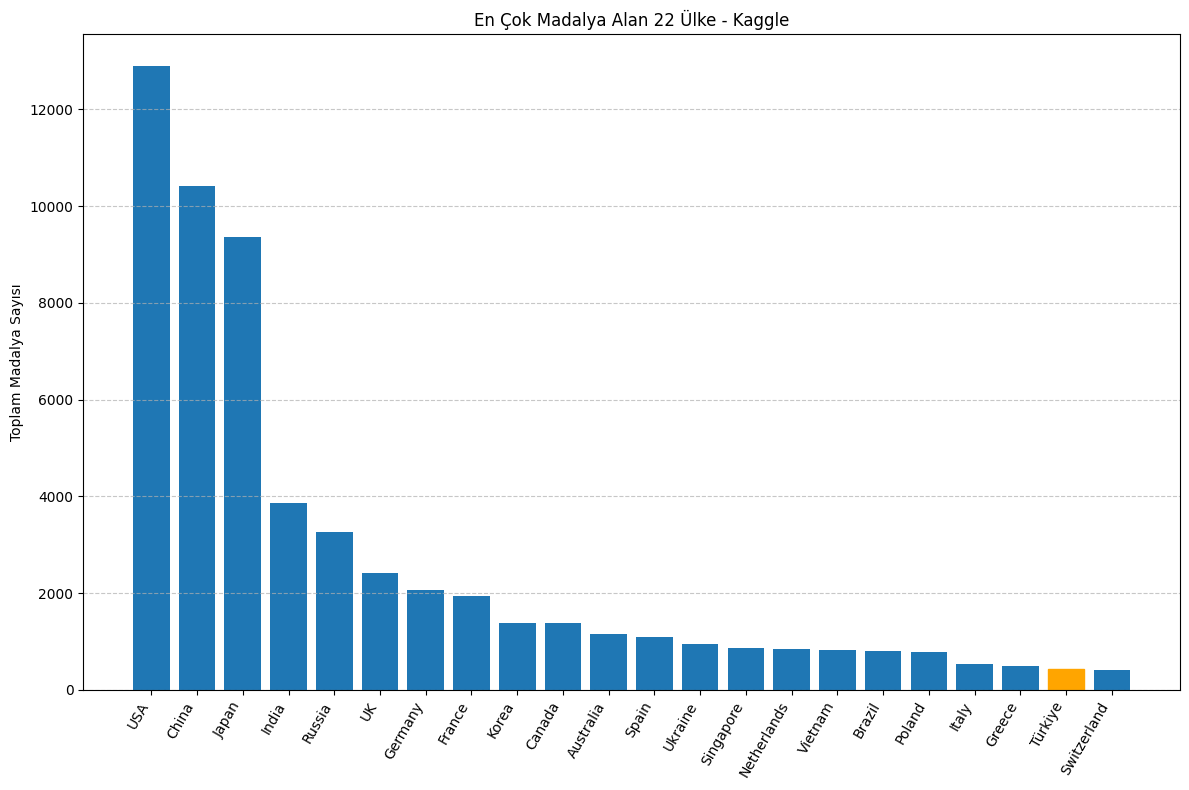

In [97]:
import matplotlib.pyplot as plt
import pandas as pd

df_pd = country_medals.to_pandas() 

# Grafik: Ülkelere göre toplam madalya sayısı (bar chart)
# Sadece ilk 22 ülkeyi al ve grafiği buna göre çiz
top_22 = df_pd.iloc[1:23]

plt.figure(figsize=(12, 8))
bars = plt.bar(top_22["Country"], top_22["Total Medals"])

# Türkiye'yi turuncu ile vurgula
for bar, country in zip(bars, top_22["Country"]):
    if country == "Türkiye":
        bar.set_color("orange")

plt.ylabel("Toplam Madalya Sayısı")
plt.title("En Çok Madalya Alan 22 Ülke - Kaggle")
plt.xticks(rotation=60, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Yorumlar

Amerika, Çin ve Japonya 10 bin dolaylarında ve üzerinde madalya sahibi olan ülkeler olarak veri bilimine çok daha ilgili olan ülkeler gibi görünüyor. 

Öte yandan 2000 madalya bandını aşmış ülkeler olan başta Hindistan daha sonra Rusya, Birleşik Krallık, Almanya ve Fransa da grafikte kendine kayda değer derecede yer bulmuş.

442 madalyası olan Türkiye'nin ise endüstrideki bu alanda gelişimine bakıldığında daha yüksek sayıda madalyası olması beklentisi içerisindeyim. 